# USDA soil properties

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
- Querying the data layer
    - Point query
    - Raster query
- References
  
## Overview

The data set contains information about soil as collected by the National Cooperative Soil Survey over the course of a century. It is available for most areas in the United States and the Territories, Commonwealths, and Island Nations served by the USDA-NRCS. The survey data was gathered by walking over the land and observing the soil. Many soil samples were analyzed in laboratories.
Let us get a practical understanding about this dataset and its usage through this tutorial.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample, mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the below config.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib

In [1]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
from PIL import Image as PILImage
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os

Now, we shall create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get Authentication token

In [2]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-01-20 19:14:04 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-01-20 19:14:04 - paw - INFO - Legacy Environment is False
2025-01-20 19:14:04 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-01-20 19:14:10 - paw - INFO - Authentication success.
2025-01-20 19:14:10 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers
We shall start by querying the catalog to retrieve the Data Set ID and the Data Layers that form the dataset.

In [6]:
pd.set_option('display.max_colwidth', None)
search_df=catalog.search("USDA soil properties")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short','data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]

,dataset_id,data_layer_id,data_layer_name,data_layer_description_short,data_layer_level,data_layer_type,data_layer_unit,data_set_name,data_set_description_short
0,93,48621,Sand (0 to 50 cm),Sand content in 0 to 50 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
1,93,48693,Clay (50 to 100 cm depth),Clay content in 50 to 100 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
2,93,48710,Clay (0 to 50 cm) (coarse),Clay content in 0 to 50 cm depth.,18,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
3,93,48622,Silt (0 to 50 cm),Silt content in 0 to 50 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
4,93,48623,Clay (0 to 50 cm),Clay content in 0 to 50 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
5,93,48625,Sum (0 to 50 cm),Sum of 3 contents in 0 to 50 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
6,93,48626,Texture (0 to 50 cm),Soil texture in 0 to 50 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
7,93,48689,Water holding capacity (0 to 50 cm),Available water holding capacity for 0 to 50 cm depth.,21,Raster,cm,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
8,93,48690,Water holding capacity (50 to 100 cm),Available water holding capacity for 50 to 100 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."
9,93,48691,Water holding capacity (100 to 150 cm),Available water holding capacity for 100 to 150 cm depth.,21,Raster,,USDA soil properties,"Soil property data, gathered over a century, from the Soil Survey Geographic Database (SSURGO) of the U.S. Department of Agriculture (USDA)."


As seen above, the Data Set of ID 93 has a twenty four Data Layers . These Data Layers are a collection of various soil properties measured at different depths. Each of the Data Layers are identified by a unique Data Layer ID. To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

## Querying the data layers
Given the large number of data layers in this data set, we will focus on selecting specific layers of interest for our queries.

### Point Query
Next, we shall make a point query for locations in different parts of the USA to observe soil information values and gauge the soil features.

In [26]:
query_result = query.submit(
    {
        "layers" : [
            {
                "type" : "raster", 
                "id" : "48694"
            },
            {
                "type" : "raster", 
                "id" : "48693"
            },
            {
                "type" : "raster", 
                "id" : "48695"
            },
            {
                "type" : "raster", 
                "id" : "48697"
            },
            {
                "type" : "raster", 
                "id" : "48690"
            }
        ],
        "spatial" : {
            "type" : "point",
            "coordinates" : [
                "29.16767705372483", "-89.24839765815922",    #Mississippi River delta
                "36.042519", "-82.835764",                    #Blue Ridge Mountains, North Carolina
                "38.094382", "-119.473812"                   #Sierra Nevada Mountains, California
            ] 
        },
        "temporal" : {
            "intervals" : [
                {
                    "start" : "2015-01-01T00:00:00Z", 
                    "end" : "2015-01-01T00:00:00Z"
                }
            ]
        }
    } , client=EI_client_v3)

point_df = query_result.point_data_as_dataframe()
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-01-15 13:01:53 - paw - INFO - TASK: submit STARTING.
2025-01-15 13:01:56 - paw - INFO - TASK: submit COMPLETED.


,layer_id,layer_name,dataset,longitude,latitude,value,datetime
0,48690,Water holding capacity (50 to 100 cm),USDA soil properties,-89.248398,29.167677,9.199999809265137,2015-01-01T00:00:00Z
1,48690,Water holding capacity (50 to 100 cm),USDA soil properties,-82.835764,36.042519,0.07000000029802322,2015-01-01T00:00:00Z
2,48690,Water holding capacity (50 to 100 cm),USDA soil properties,-119.473812,38.094382,1.6799999475479126,2015-01-01T00:00:00Z
3,48693,Clay (50 to 100 cm depth),USDA soil properties,-89.248398,29.167677,0.41187500953674316,2015-01-01T00:00:00Z
4,48693,Clay (50 to 100 cm depth),USDA soil properties,-82.835764,36.042519,0.22499999403953552,2015-01-01T00:00:00Z
5,48693,Clay (50 to 100 cm depth),USDA soil properties,-119.473812,38.094382,0.04251333326101303,2015-01-01T00:00:00Z
6,48694,Sand (50 to 100 cm),USDA soil properties,-89.248398,29.167677,0.08552499860525131,2015-01-01T00:00:00Z
7,48694,Sand (50 to 100 cm),USDA soil properties,-82.835764,36.042519,0.2239999920129776,2015-01-01T00:00:00Z
8,48694,Sand (50 to 100 cm),USDA soil properties,-119.473812,38.094382,0.7218533158302307,2015-01-01T00:00:00Z
9,48695,Silt (50 to 100 cm),USDA soil properties,-89.248398,29.167677,0.5026000142097473,2015-01-01T00:00:00Z


We see above, soil information for various locations we queried for. For instance, the location at coordinates (29.167677, -89.248398) in the Mississippi River Delta has a water holding capacity of 9.199999809265137 cm as of 01/01/2015.
Note: The comments within the query JSON, intended for descriptive purposes, may cause compatibility issues in other programming languages and should be removed when using the data in those contexts.

### Raster Query
Next, we shall make a raster query for a square area in North Carolina and observe it's soil information and characteristics of that terrain.

In [35]:
USDA_soil_properties_Result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "Soil properties for an area in North Carolina",
        "spatial": {
            "type": "square",
            "coordinates": [
                35.453847, -83.696494, 
                35.491950, -83.633650
            ]
        },
        "temporal": {
            "intervals": [
              {
                "start": "2015-01-01T00:00:00Z",
                "end": "2015-01-01T00:00:00Z"
              }
            ]
        },
        "layers": [
            {
                "type" : "raster", 
                "id" : "48694"
            },
            {
                "type" : "raster", 
                "id" : "48693"
            },
            {
                "type" : "raster", 
                "id" : "48695"
            },
            {
                "type" : "raster", 
                "id" : "48697"
            },
            {
                "type" : "raster", 
                "id" : "48690"
            }
        ]
    }, client=EI_client_v3)

2025-01-15 16:28:25 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-01-15 16:28:27 - paw - INFO - The query was successfully submitted with the id: 1736899200_39507630.
2025-01-15 16:28:29 - paw - INFO - The query 1736899200_39507630 has the status Queued.
2025-01-15 16:29:02 - paw - INFO - The query 1736899200_39507630 has the status Running.
2025-01-15 16:29:33 - paw - INFO - The query 1736899200_39507630 has the status Succeeded.
2025-01-15 16:29:33 - paw - INFO - The query 1736899200_39507630 was successful after checking the status.
2025-01-15 16:30:05 - paw - INFO - The query 1736899200_39507630 has the status Succeeded.
2025-01-15 16:30:05 - paw - INFO - The query 1736899200_39507630 was successful after checking the status.
2025-01-15 16:30:05 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Environmental-Intelligence-internal/geospatial_analytics/v3_apis/samples/industry_use_cases/datasets/us_soil_properties/dow

The query takes a few seconds to complete and downloads the output as a zip file in the /download folder within the same location as this notebook. Now let us display the resultant tiffs using the following utility function.

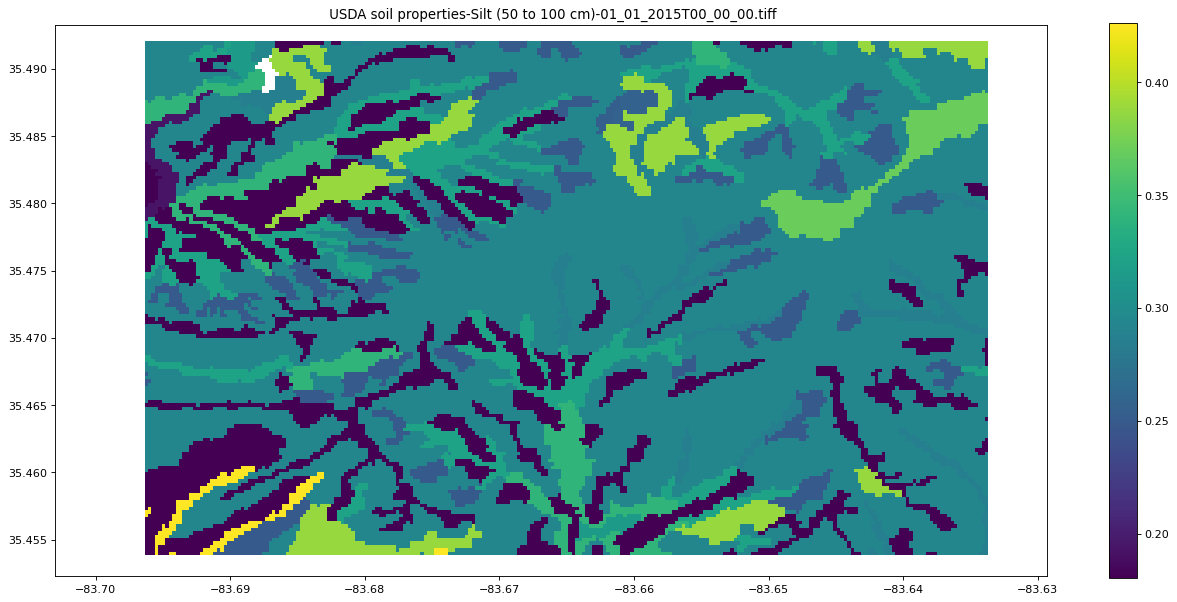

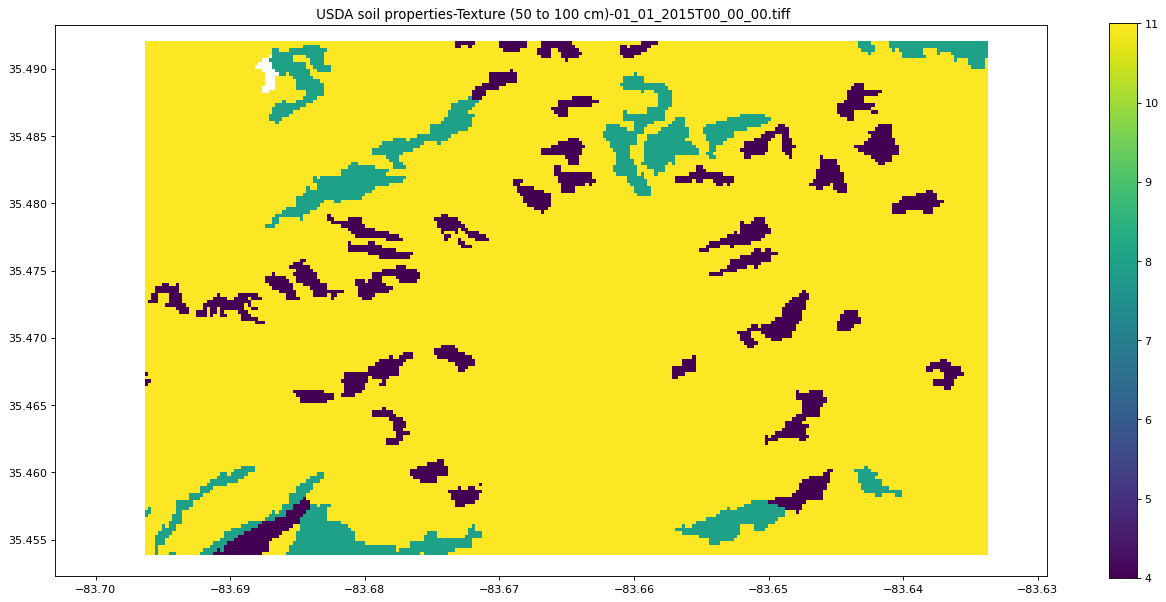

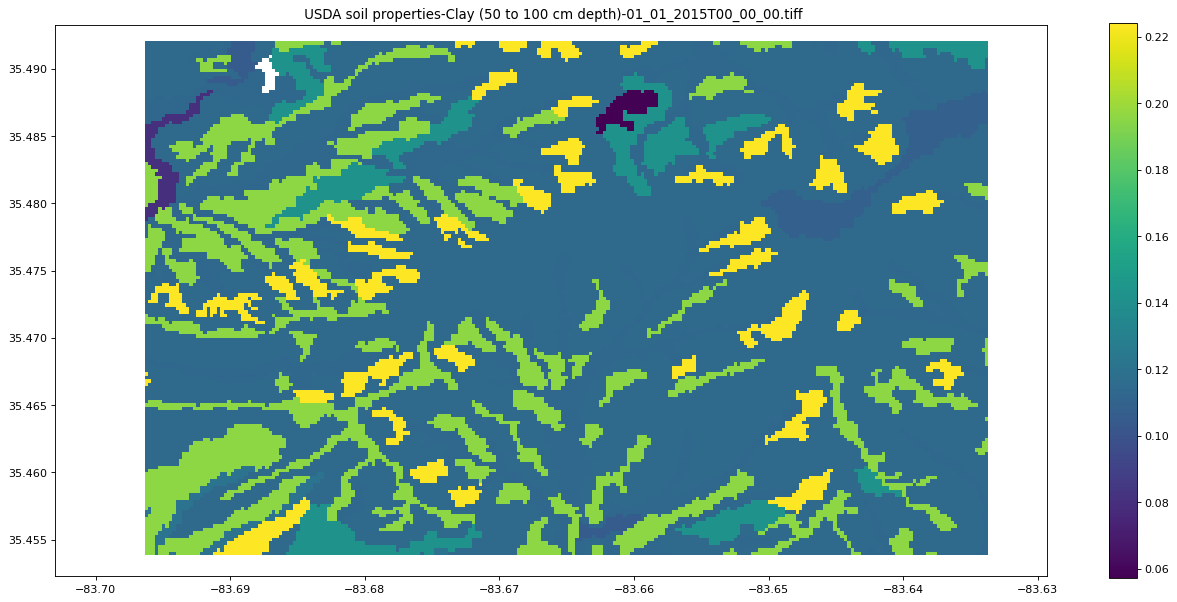

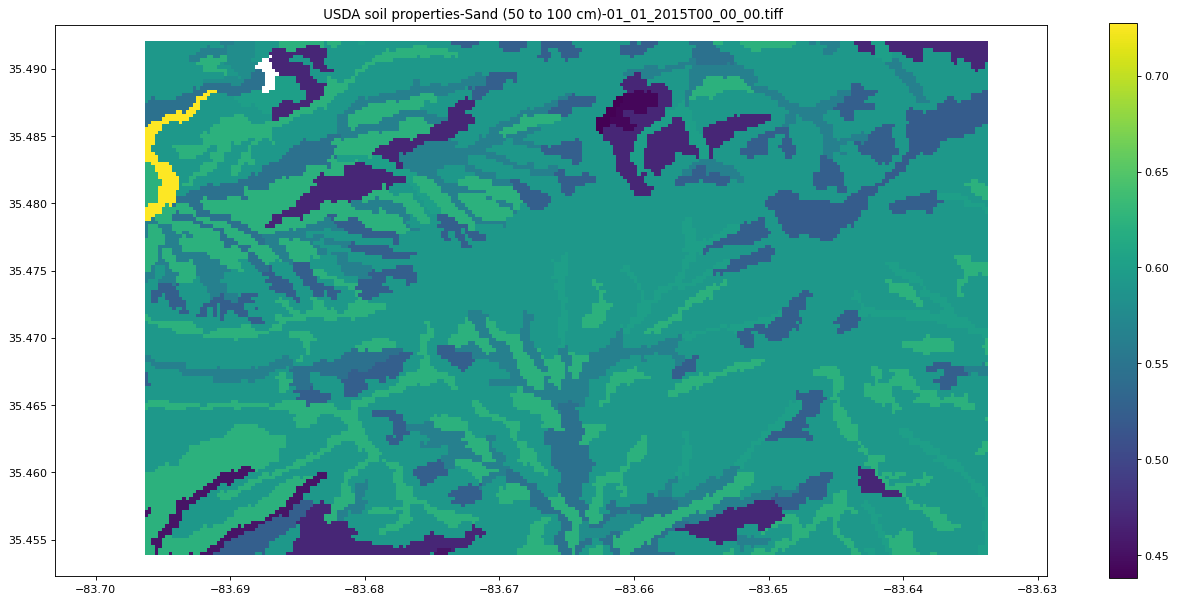

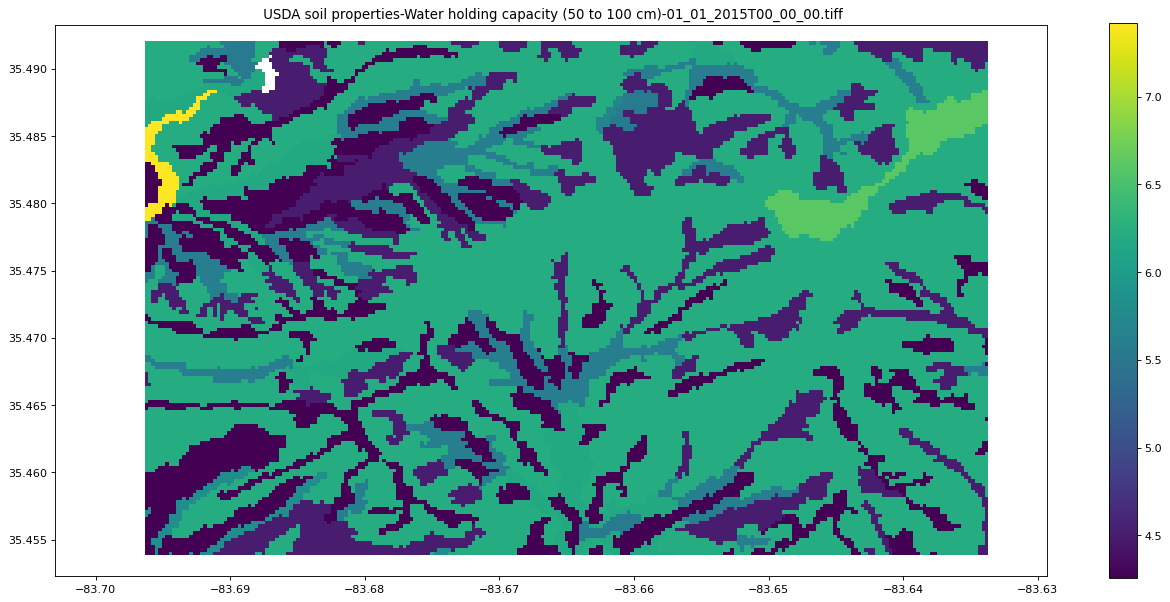

In [37]:
# Function to display the resulting Tiff(s).
USDA_soil_properties_Result_file_list = USDA_soil_properties_Result.list_files()
output_image_array = []
for file in USDA_soil_properties_Result_file_list:
    if file.endswith('.tiff'): #display the raster images
        with open(file+'.json', 'r') as summary_file:
            fileparms = json.load(summary_file)
        boundingBox=fileparms["boundingBox"]
        pixelStatistics=fileparms["rasterStatistics"]
        myextent=[boundingBox["minLongitude"],
                  boundingBox["maxLongitude"],
                  boundingBox["minLatitude"],
                  boundingBox["maxLatitude"]]  
        arrayUSDA = np.array(PILImage.open(file))
        mask = (arrayUSDA == -9999)
        # Masked array to exclude NO Data points from plotting
        masked_array = np.ma.masked_array(arrayUSDA, mask)
        plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
        plt.imshow(masked_array,
                   cmap = 'viridis', 
                   vmin=pixelStatistics["pixelMin"], 
                   vmax=pixelStatistics["pixelMax"],
                   extent = myextent) # Loads the raster data and sets the colormap
        plt.colorbar() # Adds the color bar
        plt.title(" "+os.path.basename(file)) 
        output_image_path = os.path.splitext(os.path.basename(file))[0] + ".png"
        plt.savefig(output_image_path, bbox_inches='tight')
        output_image_array.append(output_image_path)
        plt.close()

for output_image in output_image_array:
    #display the raster images
    display(Image(output_image,width=800, height=400))

Each of the images above represents data for a specific soil property, corresponding to the queried spatial location and time period. The color gradient provides a visual representation of the magnitude and distribution of the soil data.

### References
- https://ncss-tech.github.io/misc/soil-data-sources/ssurgo.html
- https://websoilsurvey.sc.egov.usda.gov/App/WebSoilSurvey.aspx